<a href="https://colab.research.google.com/github/EjbejaranosAI/MAI-UPC/blob/main/filters_and_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
import matplotlib.gridspec as gridspec
from skimage.color import rgb2gray


from sklearn import preprocessing
from scipy import ndimage

# Convolution
Hint: 
*   *convolve function is available in skimage.filters.edges module*

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to one.

Shell you  normalize the mask before convolving the image with it? Why?

What types the mask and the image should be? Justify your answer.

What is the range of values before and after the convolution?

[[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]


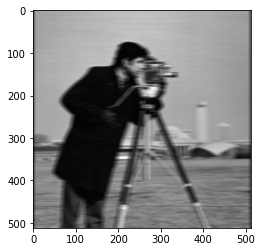

In [27]:
# solution
camera = data.camera()
#Pass the the image to float
camera = camera.astype(float)

#Create the mask and then normalizes the mask
Horizontal_mask = np.ones((1,15))/15
#Convulation of the image
C_Conv_H = ndimage.convolve(camera,Horizontal_mask, mode='constant', cval=0.0)

plt.imshow(C_Conv_H,cmap='gray')
plt.show
print(Horizontal_mask)

El realce espacial es un procesamiento matemático sobre los pixeles de una imagen, con el fin de resaltar ciertos tipos de relaciones. Para esto se usan las llamadas máscaras de convolución o filtros espaciales, que son ventanas con valores dados por el tipo de relación espacial que se quiere resaltar.

*   Convolve the image with a vertical mask:  (15 x 1) with  values set to one

<function matplotlib.pyplot.show>

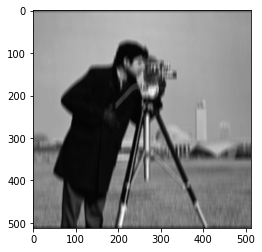

In [28]:
# solution
Vertical_Mask = np.ones((15,1))/15

C_Conv_V = ndimage.convolve(camera,Vertical_Mask, mode='constant', cval=0.0)

plt.imshow(C_Conv_V, cmap='gray')
plt.show


*   Convolve the image with a 2D mask:  (15 x 15) with  values set to one

<function matplotlib.pyplot.show>

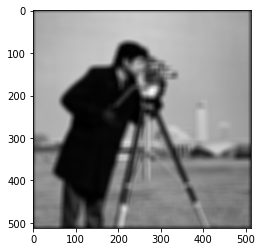

In [29]:
# solution
TwoD_Mask = np.ones((15,15))/(15*15)
C_Conv_2d = ndimage.convolve(camera,TwoD_Mask, mode='constant', cval=0.0)
plt.imshow(C_Conv_2d,cmap='gray')
plt.show

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

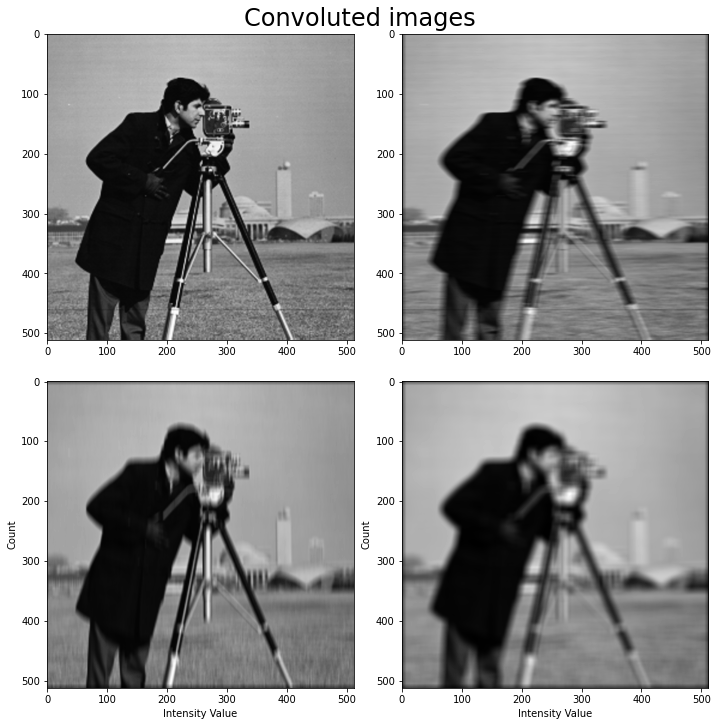

In [51]:
# solution

#Plot 
plt.figure(figsize=(10, 10))
plt.suptitle('Convoluted images',y='1.01', size='24')

G = gridspec.GridSpec(2, 2)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(camera, cmap='gray')
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)

#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(C_Conv_H, cmap='gray')
#plt.text(0.5, 0.5, 'Gray Scale', ha='center', va='center', size=20, alpha=.5)

#Picture No.3
axes_3 = plt.subplot(G[1, 0])
# We Compute the histogram of the image.
plt.imshow(C_Conv_V, cmap='gray')
#plt.text(0.5, 0.5, 'Histogram Original', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')

#Picture No.4
axes_4 = plt.subplot(G[1, 1])
plt.imshow(C_Conv_2d, cmap='gray')
#plt.text(0.5, 0.5, 'Histogram gray scale', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')


plt.tight_layout()

plt.show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


0.9999999999999999
255.0
232.2177777777777


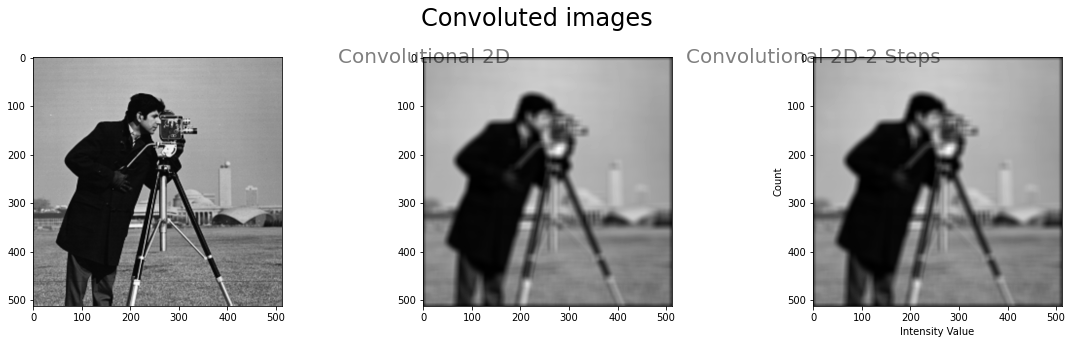

In [16]:
# solution

H_mask = np.ones((1,15))
H_mask = H_mask/H_mask.sum()
print(H_mask.sum())
V_mask = np.ones((15,1))/15


C_Conv_1 = ndimage.convolve(camera,H_mask, mode='constant', cval=0.0)
C_Conv_2 = ndimage.convolve(C_Conv_1,V_mask, mode='constant', cval=0.0)
 
print(camera.max()) 
print(C_Conv_2.max())


#Plot 
plt.figure(figsize=(15, 5))
plt.suptitle('Convoluted images',y='1.01', size='24')

G = gridspec.GridSpec(1, 3)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(camera, cmap='gray')
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)

#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.imshow(C_Conv_2d, cmap='gray')
plt.text(0.5, 0.5, 'Convolutional 2D', ha='center', va='center', size=20, alpha=.5)

#Picture No.3
axes_3 = plt.subplot(G[0, 2])
# We Compute the histogram of the image.
plt.imshow(C_Conv_2, cmap='gray')
plt.text(0.5, 0.5, 'Convolutional 2D-2 Steps', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')



plt.tight_layout()

plt.show()

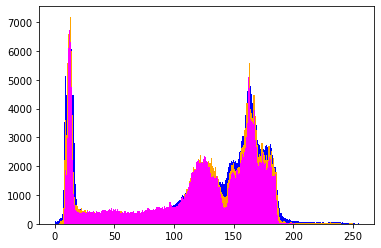

In [32]:
x= plt.hist(camera.ravel(), bins = 256, color='blue')

x= plt.hist(C_Conv_V.ravel(), bins = 256, color='orange')
x= plt.hist(C_Conv_2.ravel(), bins = 256, color='green')
x= plt.hist(C_Conv_2d.ravel(), bins = 256, color='magenta')

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

*(Double-click or enter to edit)*

...

# Image Blurring




### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Shell you convert the image into grayscale?
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

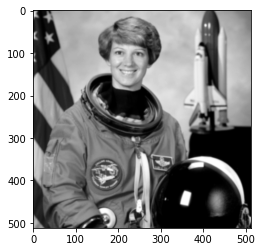

In [75]:
# solution
from skimage.filters import gaussian

astronaut = rgb2gray(data.astronaut())
astronaut = astronaut.astype(float)
plt.imshow(astronaut,cmap='gray')
sigma = (1)

astro_Gausian_1 = gaussian(astronaut, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
plt.imshow(astro_Gausian_1,cmap='gray')

*   Why is blurring important?


**Solution**

*(Double-click or enter to edit)*

...

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

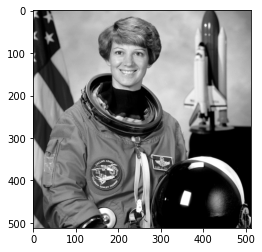

In [55]:
# solution
astro_Gausian_0 = gaussian(astronaut, sigma=0, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
plt.imshow(astro_Gausian_0,cmap='gray')


*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

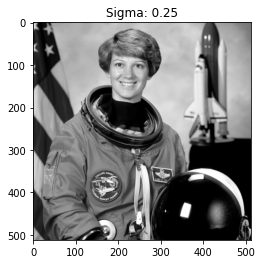

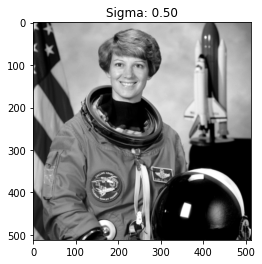

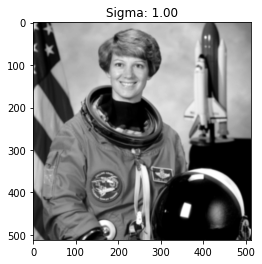

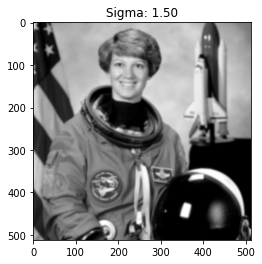

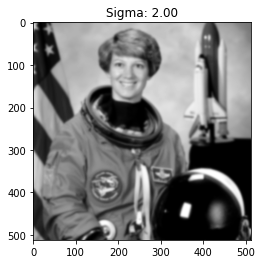

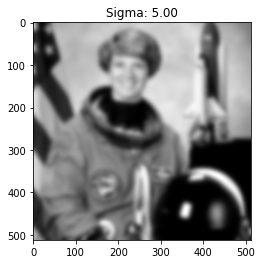

In [89]:
# solution
m = astronaut.shape
sigmaGausian = np.array([0.25, 0.5, 1, 1.5, 2, 5])

astro_Gausian= np.zeros((m[0],m[1],len(sigmaGausian)))

for i in range(len(sigmaGausian)):
  astro_Gausian[:,:,i] = gaussian(astronaut, sigma=sigmaGausian[i], output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)
  plt.imshow(astro_Gausian[:,:,i],cmap='gray')
  plt.title('Sigma: %.2f' %sigmaGausian[i])
  plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

*(Double-click or enter to edit)*

...

### Exercise: Median Filter

*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Shell you convert the 'astronauts' image to grayscale?
*   Visualize the original image and the filtered image matplotlib subplot.

In [98]:
# solution
astro_gray = rgb2gray(astronaut)
radius = ((1,5,10))
m = astronaut.shape

selem= np.zeros((m[0],m[1],len(radius)))


for i in range(len(radius)):
  selem[:,:,i] = morphology.selem.disk(radius[i])
  astronaut[:,:,i] = filters.rank.mean(astronaut, selem = selem[:,:i])
  plt.imshow(astronaut,cmap='gray')
  plt.show()


ValueError: ignored

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

In [ ]:
# solution



*   What is the effect of the structuring element on the median filter?


**Solution**

*(Double-click or enter to edit)*

...

*   What is the difference between the gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

*(Double-click or enter to edit)*

...

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

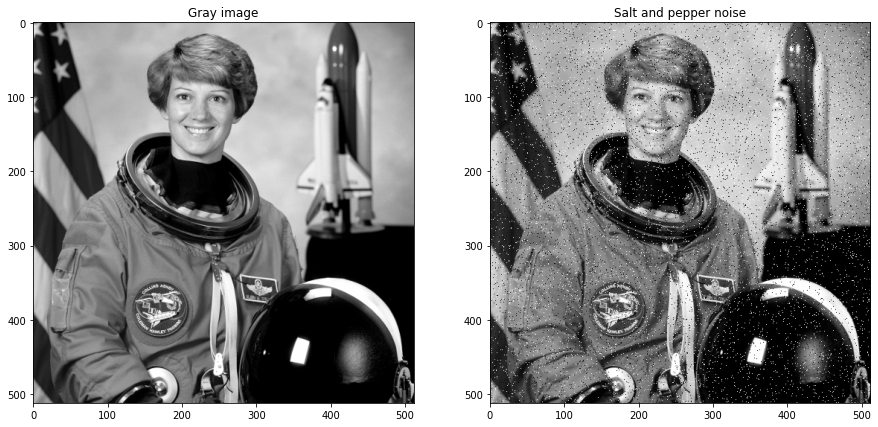

In [17]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise.
*   Apply the mean filter, median filter and gaussian filter in each of the noisy images.
*   Repeat the same on a noisy images with **salt and pepper** noise.
*   Visualize the images and observe the difference in each filter with respect to the noise.

In [ ]:
# solution



*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

*(Double-click or enter to edit)*

...

# Edge Detection

### Exercise:
*   Read the 'camera' image from the data module
*   Perform sobel and prewitt edge detection on the image
*   Compare the buildin function performance vs applying a convolution with the Sobel/Prewitt mask
*   Visualize the original image, the edges and the edges superimposed on the original image

In [ ]:
# solution




*   What is the difference between each of the edge detectors?
*   What do you think is the limitation of each of the detector?



**Solution**

*(Double-click or enter to edit)*

...

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply the Canny operator with default parameters
*   Apply the Canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.


In [ ]:
# solution



*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?
*   Does the Canny operator work on color images?


**Solution**

*(Double-click or enter to edit)*

...

*   What is the algorithm behind the Canny operator?


**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Monday, the 25th of October, 2021**
